In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/AI/[Dataset]_Rekomendasi.csv'

df = pd.read_csv(dataset_path, header=None, names=['ID', 'ItemID', 'Rating', 'Timestamp'])

df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,ItemID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ID           0
ItemID       0
Rating       0
Timestamp    0
dtype: int64


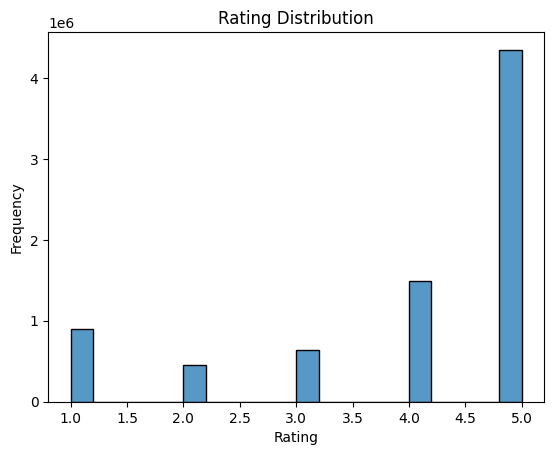

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/AI/[Dataset]_Rekomendasi.csv'

df = pd.read_csv(dataset_path, header=None, names=['ID', 'ItemID', 'Rating', 'Timestamp'])

df.head(10)

print(df.isnull().sum())

df.dropna(inplace=True)

df['ID'] = df['ID'].astype('category')
df['ItemID'] = df['ItemID'].astype('category')

df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df.drop('Timestamp', axis=1, inplace=True)

sns.histplot(df['Rating'], bins=20)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


scaler = StandardScaler()
numerical_features = ['Year', 'Month', 'Day', 'Hour']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

X = df.drop(columns=['ID', 'ItemID', 'Rating'])
y = df['Rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

file_path = "/content/drive/My Drive/AI/[Dataset]_Rekomendasi.csv"
dt = pd.read_csv(file_path, header=None, names=['UserID', 'ItemID', 'Rating', 'Timestamp'])

dt['Timestamp'] = pd.to_datetime(dt['Timestamp'], unit='s')

dt['Year'] = dt['Timestamp'].dt.year
dt['Month'] = dt['Timestamp'].dt.month
dt['Day'] = dt['Timestamp'].dt.day
dt['Hour'] = dt['Timestamp'].dt.hour

dt.drop(columns=['Timestamp'], inplace=True)

dt['ItemID'] = pd.to_numeric(dt['ItemID'], errors='coerce')
dt['ItemID'].fillna(dt['ItemID'].mean(), inplace=True)

bins = [0, 2, 4, 5]
labels = ['Low', 'Medium', 'High']
dt['Rating'] = pd.cut(dt['Rating'], bins=bins, labels=labels, include_lowest=True)

label_encoder = LabelEncoder()
dt['Rating'] = label_encoder.fit_transform(dt['Rating'])

scaler = StandardScaler()
dt[['ItemID', 'Year', 'Month', 'Day', 'Hour']] = scaler.fit_transform(dt[['ItemID', 'Year', 'Month', 'Day', 'Hour']])

X = dt[['ItemID', 'Year', 'Month', 'Day', 'Hour']]
y = dt['Rating']  # Assuming Rating is the target for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training set shape: X_train: (6259585, 5), y_train: (6259585,)
Testing set shape: X_test: (1564897, 5), y_test: (1564897,)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import joblib

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

joblib.dump(model, "/content/drive/My Drive/AI/logistic_regression_model.pkl")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5555362429603993
Precision: 0.3086205172425558
Recall: 0.5555362429603993
Confusion Matrix:
 [[869357      0      0]
 [272055      0      0]
 [423485      0      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.71    869357
           1       0.00      0.00      0.00    272055
           2       0.00      0.00      0.00    423485

    accuracy                           0.56   1564897
   macro avg       0.19      0.33      0.24   1564897
weighted avg       0.31      0.56      0.40   1564897



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['/content/drive/My Drive/AI/logistic_regression_model.pkl']

In [9]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

def preprocess_timestamp(timestamp):
    timestamp = pd.to_datetime(timestamp)
    year = timestamp.year
    month = timestamp.month
    day = timestamp.day
    hour = timestamp.hour
    return [year, month, day, hour]

def rekomendasi_pembelian(ID, ItemID, Timestamp):
    timestamp_features = preprocess_timestamp(Timestamp)
    input_data = np.array([[ID, ItemID] + timestamp_features])
    prediksi = logr.predict(input_data)
    return prediksi[0]

id_input = widgets.IntText(description='ID:')
itemid_input = widgets.IntText(description='ItemID:')
timestamp_input = widgets.Text(description='Timestamp (YYYY-MM-DD HH:MM:SS):')
output_area = widgets.Output()
submit_button = widgets.Button(description='Submit')

def on_submit(b):
    with output_area:
        clear_output()
        ID = id_input.value
        ItemID = itemid_input.value
        Timestamp = timestamp_input.value
        try:
            rating = rekomendasi_pembelian(ID, ItemID, Timestamp)
            print(f'Rating yang diprediksi: {rating}')
        except Exception as e:
            print(f'Error: {e}')

submit_button.on_click(on_submit)

display(id_input, itemid_input, timestamp_input, submit_button, output_area)


IntText(value=0, description='ID:')

IntText(value=0, description='ItemID:')

Text(value='', description='Timestamp (YYYY-MM-DD HH:MM:SS):')

Button(description='Submit', style=ButtonStyle())

Output()